#### Statistical Rigor

- This is aimed to help you understand how we use statistics to get an understanding of the data

#### About dataset

This dataset contain information on Data Science books listed on Amazon website. I have used this data to complete an exploratory data analysis from the year of 2015 through 2022.

- The columns listed in the dataset are:
- Title -title of the book
- Author - authors of the book
- Pages - Total page number
- Avg_review - Average review of the book listed on the Amazon website
- n_reviews - Total number of reviews
- star5 - percent of five star received out of the total reviews
- star4- percent of four star received out of the total reviews
- start3 -percent of three star received out of the total reviews
- star2 - percent of two star received out of the total reviews
- star1 - percent of one star received out of the total reviews
- dimension - height x width x length of the book in inches
- weight - weight of the book in lbs
- language - language in which the book was published
- publisher - name of the publisher, edition, and the publication year
- ISBN_13 - 13 digits unique code for each book
- link - link used on the Amazon website
- complete_link - full link to go land on the website

- These are the few features of the datasets:
- There are 946 unique entries for the books
- Most of the books have all information listed
- Can be used for EDA or Hypothesis testing


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [6]:
data = pd.read_csv("Domestic violence.csv")

In [7]:
data.head()

,SL. No,Age,Education,Employment,Income,Marital status,Violence
0,1,30,secondary,unemployed,0,married,yes
1,2,47,tertiary,unemployed,0,married,no
2,3,24,tertiary,unemployed,0,unmarred,no
3,4,22,tertiary,unemployed,0,unmarred,no
4,5,50,primary,unemployed,0,married,yes


In [8]:
data.shape

(347, 7)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SL. No           347 non-null    int64 
 1   Age              347 non-null    int64 
 2   Education        347 non-null    object
 3   Employment       347 non-null    object
 4   Income           347 non-null    int64 
 5   Marital status   347 non-null    object
 6   Violence         347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB


#### What to look for in the statistical summary of your dataset

1. Mean
 - It gives you an idea of the "typical" value if you could evenly distribute all values.
    - High mean: The dataset has larger values overall.
    - Low mean: The dataset has smaller values overall.
2. Median
  - The median is the middle value of your dataset when it’s sorted.
  - Less sensitive to outliers than the mean, so it’s often a better measure of central tendency for skewed data.
  - It splits your data into two halves: 50% of values are below the median, 50% above.

3.Standard Deviation
  - The standard deviation measures how spread out the data is around the mean.
  - Low std: Values are close to the mean (less variability).
  - High std: Values are widely spread out from the mean (more variability).

Comparison
- Mean ≈ Median → Data is roughly symmetrical.
- Mean > Median → Data is right-skewed (long tail on the right).
- Mean < Median → Data is left-skewed (long tail on the left).

Combined Interpretation
- Symmetry check: Compare mean and median.
- Spread check: Look at std.
- Outlier detection: Large difference between mean and median + large std hints at outliers.

In [10]:
data.describe()

,SL. No,Age,Income
count,347.000000,347.000000,347.000000
mean,174.000000,31.380403,2110.685879
std,100.314505,9.601569,5743.278766
min,1.000000,15.000000,0.000000
25%,87.500000,23.000000,0.000000
50%,174.000000,30.000000,0.000000
75%,260.500000,39.500000,0.000000
max,347.000000,60.000000,35000.000000


From the above statistical summary we note the following:
- The mean and the median are relatively close for price indicating that our data  may be symmentric but the high std might indicate some outliers
- But looking at the pages attribute the std ,we see that the is high variability in our data

### Using histogram to check our data distribution

#### What is kurtosis?
- Kurtosis measures the “tailedness” of a distribution — how heavy or light the tails are compared to a normal distribution.
- It tells you if extreme values (outliers) are more or less likely than in a normal distribution.

**Types** :
- Excess kurtosis = 3 → normal distribution
- Excess kurtosis > 3 → heavy tails
- Excess kurtosis < 3 → light tails

High kurtosis → likely outliers exist → check the data.

Low kurtosis → outliers are less likely, distribution is flatter

In [11]:
data.dropna(axis=0, inplace=True)

In [13]:
import math

<Figure size 1500x400 with 0 Axes>

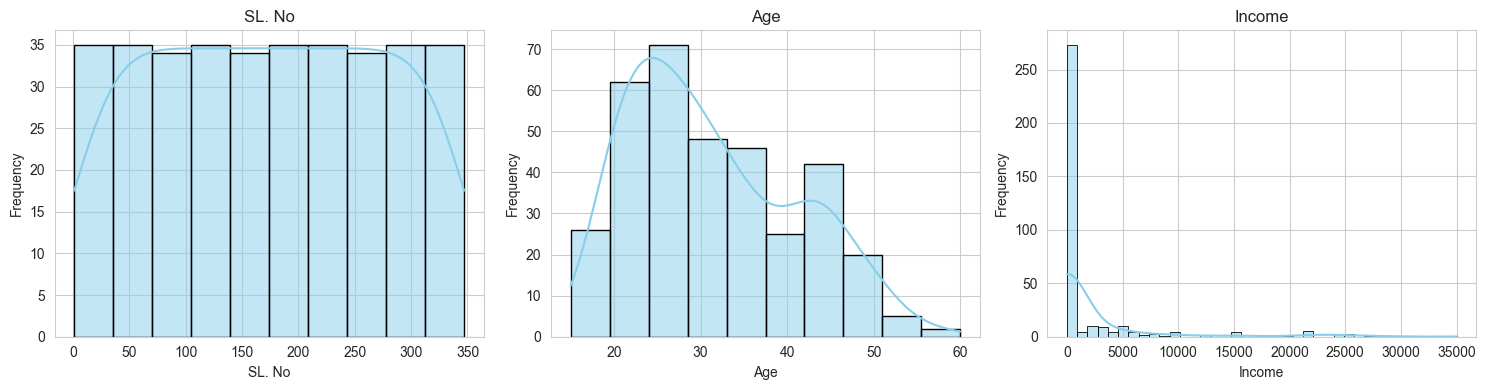

In [14]:
numeric_cols = data.select_dtypes(include='number').columns

n_cols = 3  # number of columns in grid
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[col], kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import kurtosis

In [18]:
for col in numeric_cols:
    print(f"kurtosis for {col} :" ,kurtosis(data[col]))


kurtosis for SL. No : -1.2000199322304166
kurtosis for Age : -0.6235080774450705
kurtosis for Income : 10.927885853871137


In [19]:
outlier_indices = {}

for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier condition
    outliers = data[(data[col] < Q1 - 1.5*IQR) | (data[col] > Q3 + 1.5*IQR)]
    outlier_indices[col] = outliers.index.tolist()
    print(f"{col}: {len(outliers)} outliers")

all_outliers_idx = set(idx for col_idx in outlier_indices.values() for idx in col_idx)

# Convert the set to a list before using .loc
all_outliers = data.loc[list(all_outliers_idx)]
print(f"Total rows with outliers in any column: {len(all_outliers)}")

SL. No: 0 outliers
Age: 0 outliers
Income: 75 outliers
Total rows with outliers in any column: 75


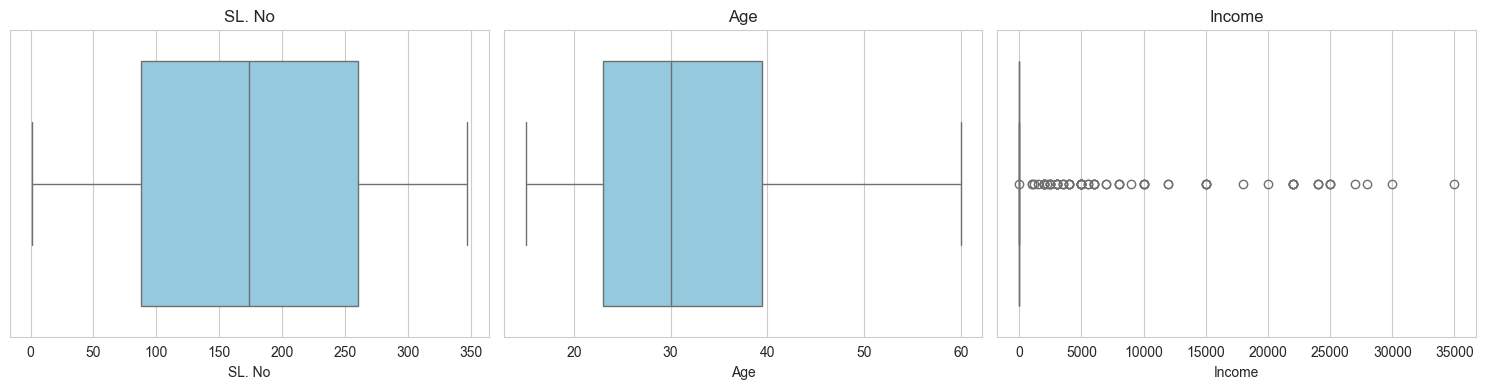

In [20]:
n_cols = 3  # number of columns in grid
n_rows = math.ceil(len(numeric_cols) / n_cols)
plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'{col}')

plt.tight_layout()
plt.show()

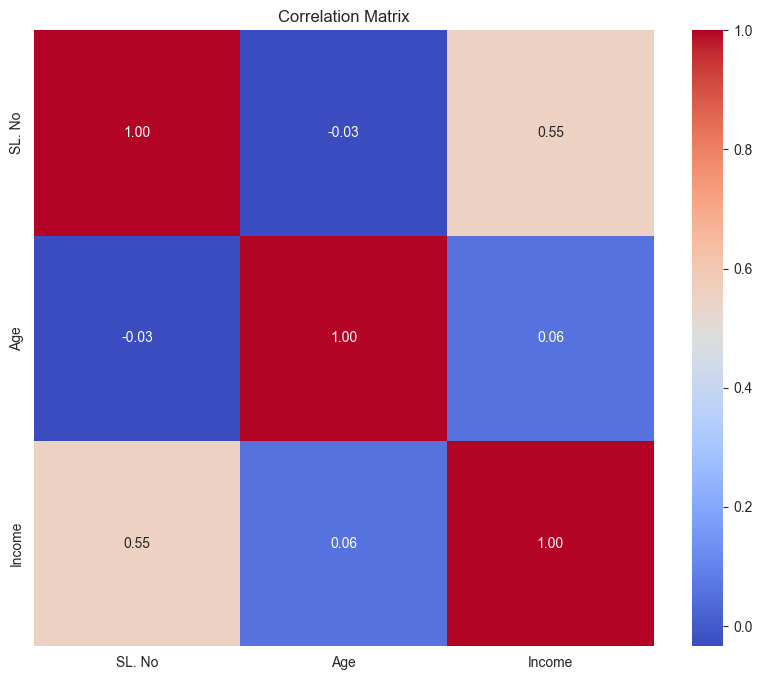

In [21]:
corr_matrix = data[numeric_cols].corr()

# Display heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [22]:
data.columns

Index(['SL. No', 'Age', 'Education ', 'Employment ', 'Income',
       'Marital status ', 'Violence '],
      dtype='object')

In [25]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(data['Marital status '], data['Income'])

chi2, p, dof, ex = chi2_contingency(contingency_table)

print(f"Chi2 Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Reject null hypothesis → variables are dependent")
else:
    print("Fail to reject null → variables are independent")

Chi2 Statistic: 31.104284278959813
P-value: 0.31246925536962417
Fail to reject null → variables are independent


In [26]:
from scipy.stats import f_oneway

groups = [data[data['Education '] == val]['Age'] for val in data['Education '].unique()]

f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_val}")

if p_val < 0.05:
    print("Reject null hypothesis → mean prices differ across star1 groups")
else:
    print("Fail to reject null → no significant difference in means")

F-statistic: 37.1790267209376
P-value: 7.926552077838842e-21
Reject null hypothesis → mean prices differ across star1 groups


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Run Tukey's HSD
tukey = pairwise_tukeyhsd(endog=data['Age'],   # numeric variable
                          groups=data['Education '],  # categorical variable
                          alpha=0.05)          # significance level

Found 5 significant comparisons:
      group1     group2  meandiff   p-adj
1       none  secondary  -12.4420  0.0000
2       none   tertiary   -6.6609  0.0005
3    primary  secondary   -9.4717  0.0000
4    primary   tertiary   -3.6906  0.0436
5  secondary   tertiary    5.7811  0.0004


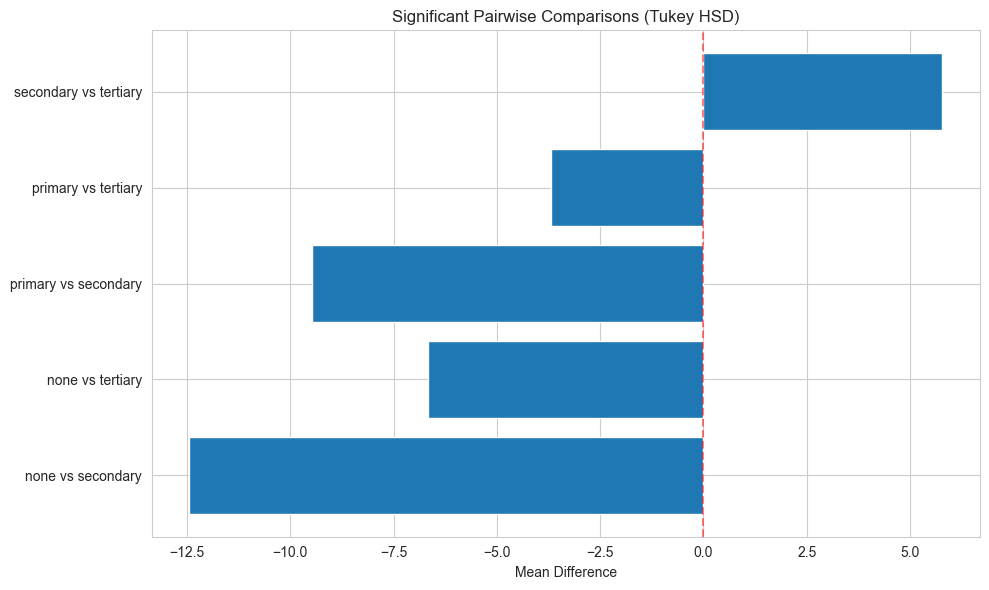

In [28]:
tukey_df = pd.DataFrame(data=tukey.summary().data[1:],
                        columns=tukey.summary().data[0])

# Filter for significant comparisons only
significant = tukey_df[tukey_df['reject'] == True]

print(f"Found {len(significant)} significant comparisons:")
print(significant[['group1', 'group2', 'meandiff', 'p-adj']])

# Create a simple visualization
plt.figure(figsize=(10, 6))
plt.barh(range(len(significant)), significant['meandiff'])
plt.yticks(range(len(significant)),
           [f"{row['group1']} vs {row['group2']}" for _, row in significant.iterrows()])
plt.xlabel('Mean Difference')
plt.title('Significant Pairwise Comparisons (Tukey HSD)')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

 Higher star ratings (like 0.08 and 0.09) have significantly different prices compared to lower ratings (0.0, 0.01, 0.02, 0.03)